In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import pickle

In [3]:
pd.options.display.max_columns = None

In [4]:
df = pd.read_csv("df.csv")
df.head(1)

property_type                Sector        City     Area  bedRoom  bathroom  \
0   House/Villa  Sector 15 Chandigarh  Chandigarh  18000.0        7         7   

   balcony  Pooja Room  Servant Room  Store Room  Study Room  Other Room  \
0        4           0             1           0           0           0   

       facing  FloorNo FloorRise  Main Road  Park/Garden  Pool  Club  \
0  North-West        0  Low-Rise          0            0     0     0   

   Overlook Others agePossession Flooring GatedCommunity     Furnishing  \
0                1           Old   Marble             No  Semifurnished   

   CoveredParking  OpenParking  24*7 Water  MuniCorp Water  Borewell/Tank  \
0               3            3           1               1              0   

  PowerBackup WheelChairFriendly PetFriendly Facilities Categories  price  
0          No                Yes         Yes              Standard   28.0

In [17]:
# with open('df_v3.pkl','wb') as file:
#     pickle.dump(df,file)

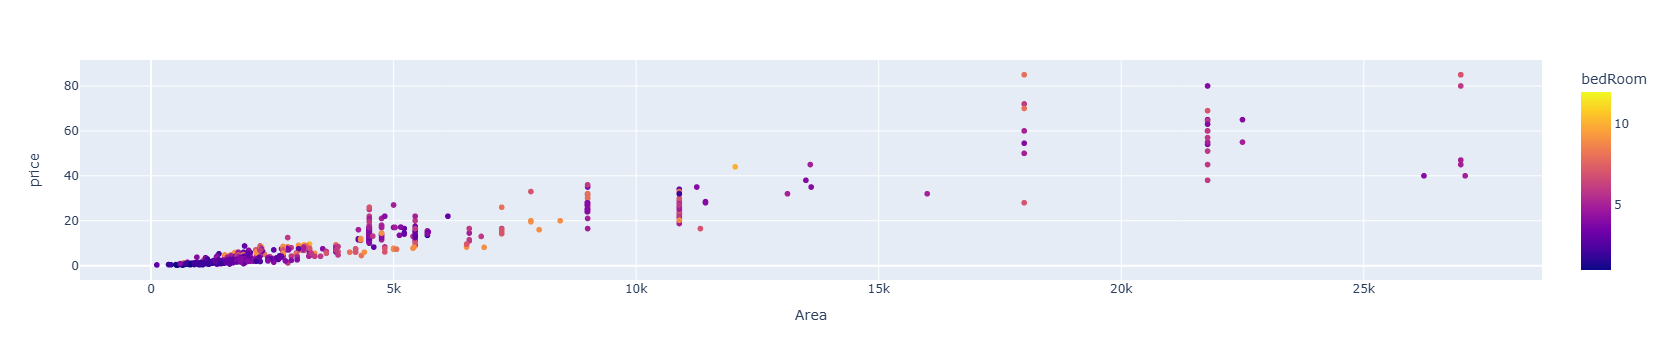

In [14]:
city = 'Chandigarh'

fig = px.scatter(data_frame = (df if city == 'Tricity' else df[df['City'] == city]), x = 'Area', y = 'price', color = 'bedRoom')
fig.show()

In [26]:
temp_df = df.copy()

In [27]:
temp_df['price'] = temp_df['price'] * 10000000

In [28]:
temp_df.groupby(['City','Sector'])['price'].mean()

City        Sector              
Chandigarh  Daria                   6.320000e+06
            Manimajra               1.741613e+07
            Naya Gaon               7.033333e+06
            Sector 10 Chandigarh    1.957000e+08
            Sector 11 Chandigarh    1.542636e+08
                                        ...     
Panchkula   Sector 4 Panchkula      4.556604e+07
            Sector 6 Panchkula      1.739571e+08
            Sector 7 Panchkula      7.852586e+07
            Sector 8 panchkula      7.972250e+07
            Sector 9 Panchkula      6.422340e+07
Name: price, Length: 136, dtype: float64

In [29]:
df['price_per_sqft'] = (df["price"] * 10000000)/df["Area"]
temp_df = df[['City','property_type','Sector','price_per_sqft']].copy()

In [30]:
temp_df

City   property_type                Sector  price_per_sqft
0     Chandigarh     House/Villa  Sector 15 Chandigarh    15555.555556
1     Chandigarh     House/Villa  Sector 11 Chandigarh    31111.111111
2         Mohali     House/Villa                Mohali     6944.444444
3         Mohali     House/Villa            Dera Bassi     5843.253968
4         Mohali     House/Villa        New Chandigarh    16666.666667
...          ...             ...                   ...             ...
8408      Mohali  Flat/Apartment      Sector 91 Mohali     6343.283582
8409      Mohali  Flat/Apartment     Sector 116 Mohali     3244.795406
8410      Mohali  Flat/Apartment                Kharar     2759.415834
8411      Mohali  Flat/Apartment      Sector 70 Mohali     3589.053387
8412      Mohali  Flat/Apartment     Sector 114 Mohali     4453.441296

[8413 rows x 4 columns]

In [31]:
df_grouped = df.groupby(['City', 'Sector']).agg(
    count=('price_per_sqft', 'size'),            # Count of houses
    mean_price=('price_per_sqft', 'mean')        # Mean of price_per_sqft
).reset_index()

In [32]:
df_grouped

City                Sector  count    mean_price
0    Chandigarh                 Daria      5   6426.220416
1    Chandigarh             Manimajra     31  11542.575693
2    Chandigarh             Naya Gaon      9   5483.202632
3    Chandigarh  Sector 10 Chandigarh     11  28934.921827
4    Chandigarh  Sector 11 Chandigarh     22  28597.356138
..          ...                   ...    ...           ...
131   Panchkula    Sector 4 Panchkula     53  16244.411248
132   Panchkula    Sector 6 Panchkula     28  26720.367149
133   Panchkula    Sector 7 Panchkula     58  20877.494487
134   Panchkula    Sector 8 panchkula     40  19756.126225
135   Panchkula    Sector 9 Panchkula     47  20436.354158

[136 rows x 4 columns]

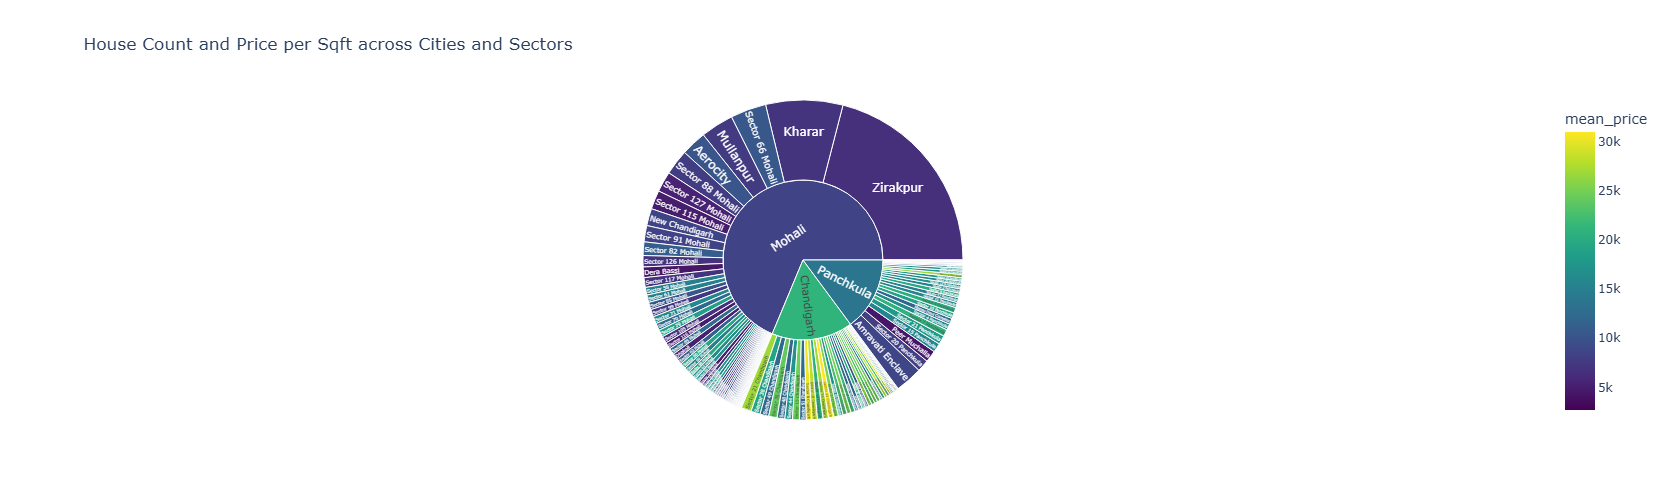

In [34]:
fig = px.sunburst(df_grouped, 
                  path=['City', 'Sector'],        # Define hierarchy: City -> Sector
                  values='count',                 # Use count for the size of sectors
                  color='mean_price',             # Use mean_price for the color
                  color_continuous_scale='Viridis', # Optional: customize color scale
                  title="House Count and Price per Sqft across Cities and Sectors",
                  height =500)

fig.show()

In [ ]:
px.sunburst(temp_df, path=['City','Sector'],values='pop',color='lifeExp',height =500)

In [50]:
df_grouped2 = df.groupby(['property_type','City', 'Sector']).agg(
    count=('price_per_sqft', 'size'),            # Count of houses
    price_per_sqft=('price_per_sqft', 'mean')        # Mean of price_per_sqft
).reset_index()

In [54]:
df_grouped2.rename(columns = {'price_per_sqft' : 'Price Per Sqft'},inplace = True)

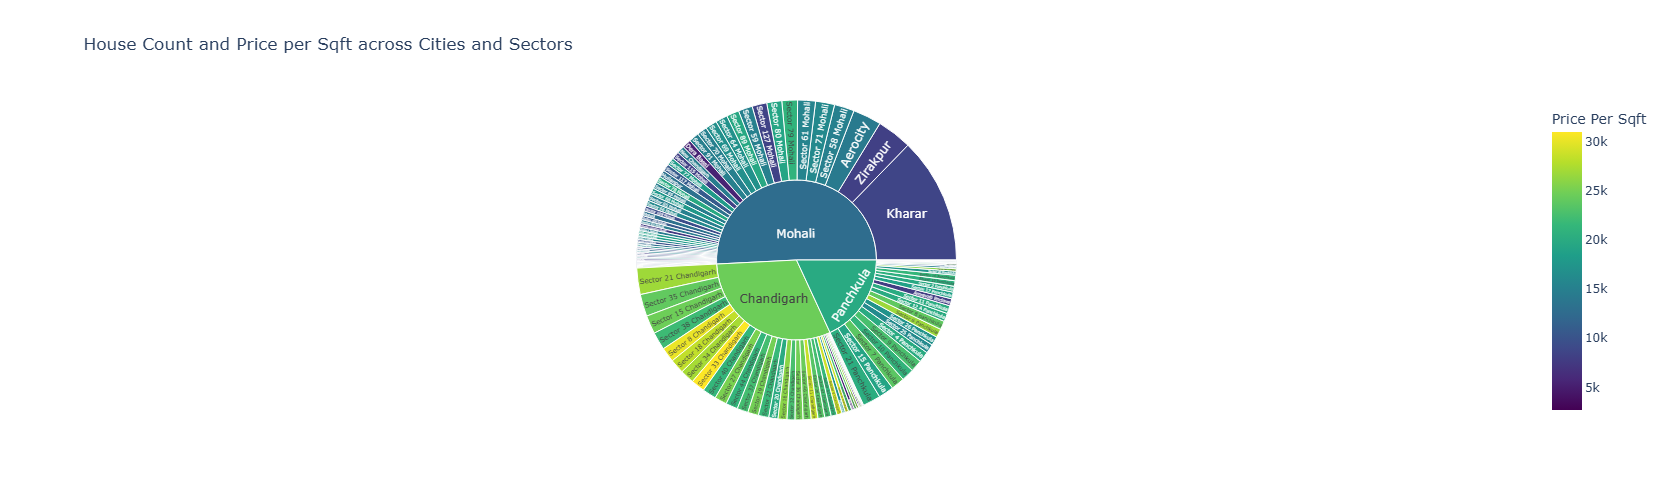

In [56]:
fig = px.sunburst(df_grouped2[df_grouped2['property_type'] == 'House/Villa'], 
                  path=['City', 'Sector'],        # Define hierarchy: City -> Sector
                  values='count',                 # Use count for the size of sectors
                  color='Price Per Sqft',             # Use mean_price for the color
                  color_continuous_scale='Viridis', # Optional: customize color scale
                  title="House Count and Price per Sqft across Cities and Sectors",
                  height =500)

fig.show()

In [57]:
# with open('sunburst_df.pkl','wb') as file:
#     pickle.dump(df_grouped2,file)

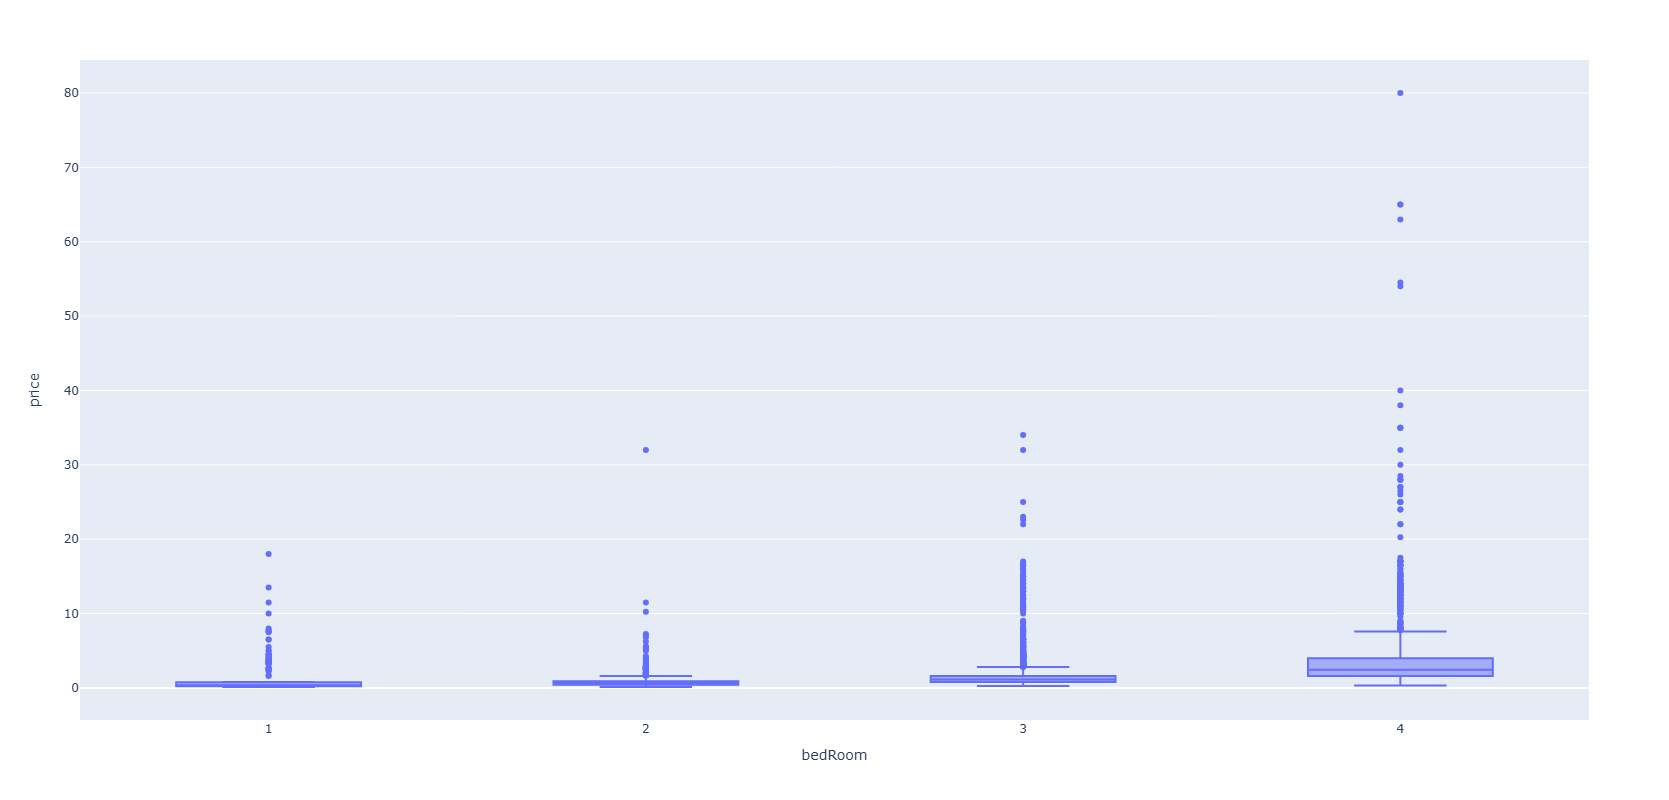

In [18]:
px.box(df[df['bedRoom'] < 5], x = 'bedRoom',y='price',height = 800,width = 800)

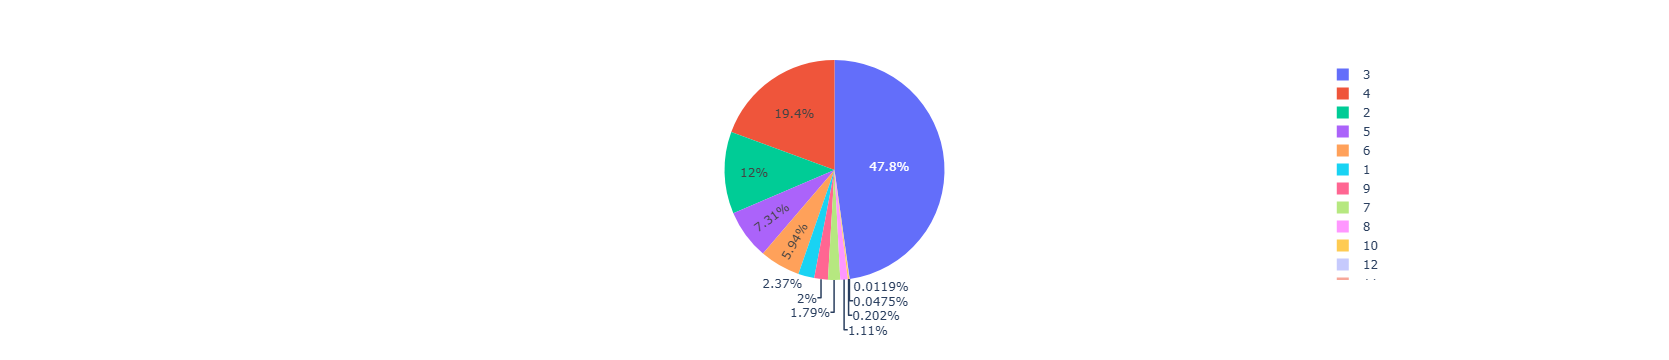

In [7]:
px.pie(df['Sector'] == '',names='bedRoom')

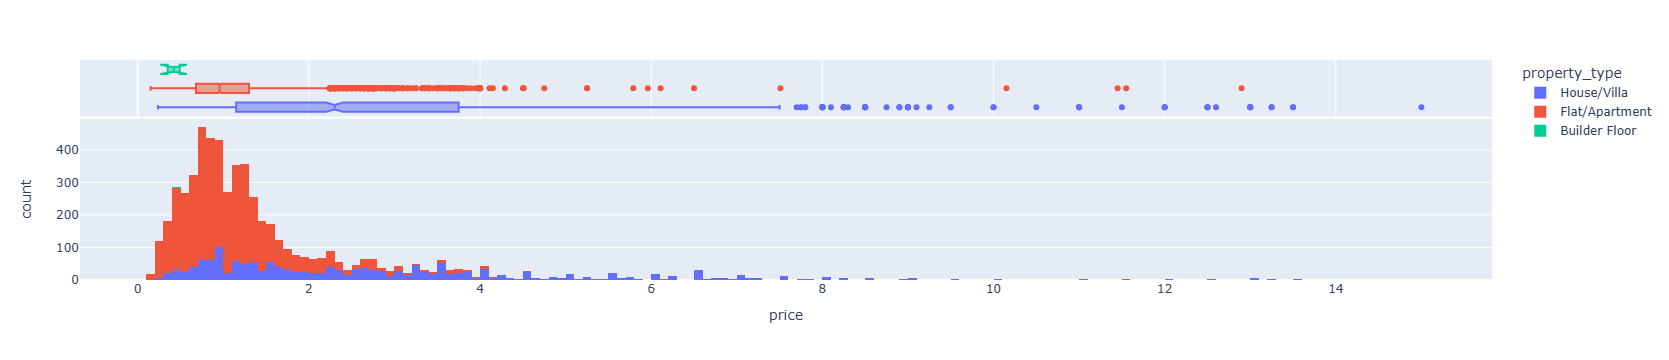

In [10]:
fig = px.histogram(df[df['City'] == 'Mohali'], x="price", color="property_type", marginal="box",
                   hover_data=df.columns)
fig.show()

In [19]:
import plotly.figure_factory as ff


In [20]:
import seaborn as sns

In [21]:
sns.__version__

'0.13.2'

C:\Temp\ipykernel_16036\1484360925.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Temp\ipykernel_16036\1484360925.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




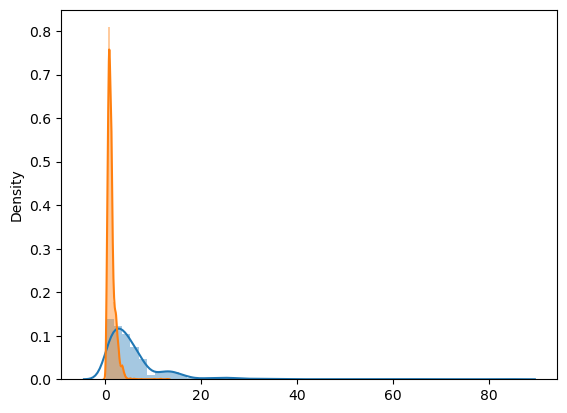

In [28]:
sns.distplot(x = df[(df['property_type'] == 'House/Villa')]['price'])
sns.distplot(x = df[df['property_type'] == 'Flat/Apartment']['price'])
plt.show()

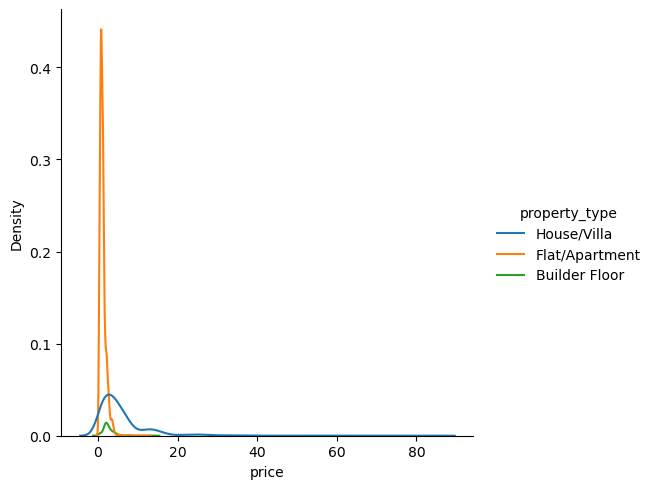

In [34]:
sns.displot(df, x = 'price', hue = 'property_type',kind = 'kde')
plt.show()

C:\Temp\ipykernel_16036\266524468.py:3: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



<Figure size 1000x400 with 0 Axes>

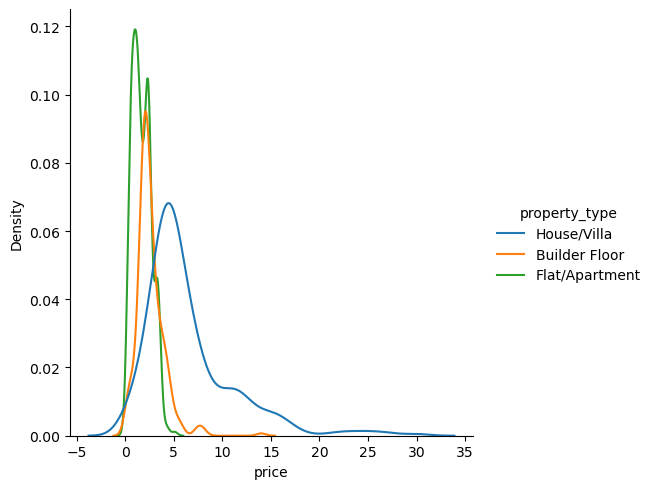

In [42]:
fig = plt.figure(figsize=(10, 4))
sns.displot(df[df['City'] == 'Panchkula'], x = 'price', hue = 'property_type',kind = 'kde')
fig.show()

In [43]:
import matplotlib

In [44]:
matplotlib.__version__

'3.8.0'

In [45]:
sns.__version__

'0.13.2'

<Axes: xlabel='price', ylabel='Density'>

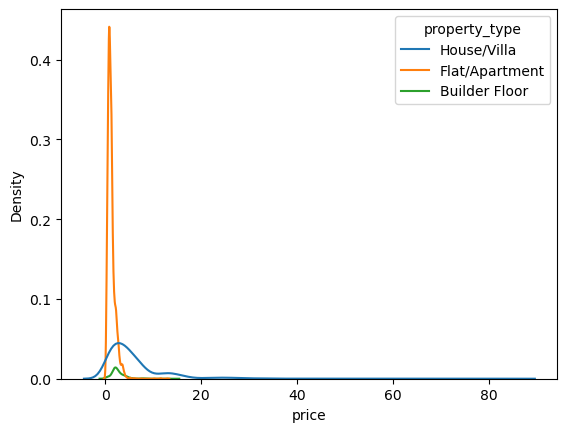

In [46]:
sns.kdeplot(df, x = 'price', hue = 'property_type')